# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
# carico il file excel
food = pd.read_excel("data/food_consumption.xlsx")

In [3]:
#ispeziono le prime 5 righe
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [4]:
# controllo i valori unici della colonna food_category
food['food_category'].unique()

array(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy',
       'wheat', 'rice', 'soybeans', 'nuts'], dtype=object)

1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [5]:
#uso describe per avere una panoramica e produrre una statistica descrittiva
food.groupby('food_category')['consumption'].describe().sort_values( by='mean',ascending=False)
# dairy ha il valore medio più alto per consumo

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03


2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

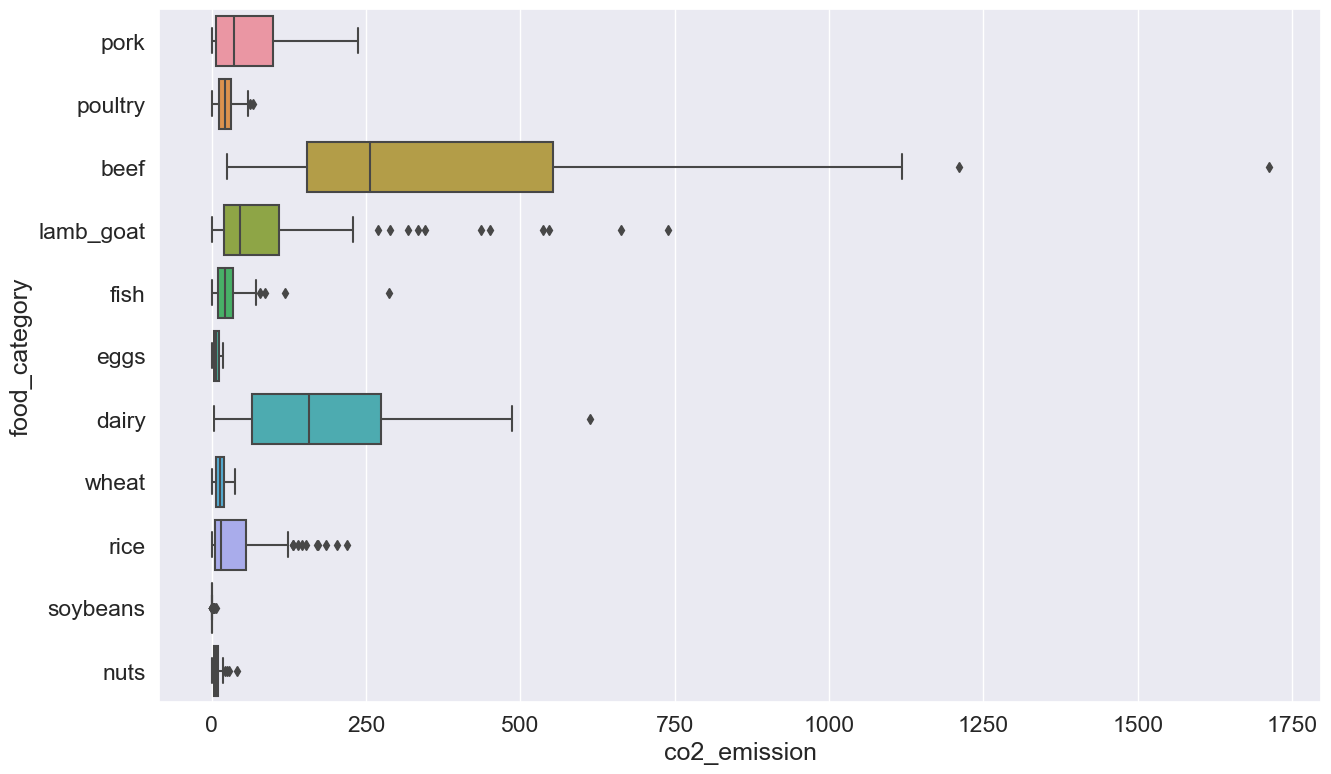

In [6]:
#utilizzo il boxplot, beef ha il più alto IQR tra le altre categorie
sns.boxplot(x='co2_emission', y='food_category', data=food)

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [7]:
# beef ha la più alta media di emissioni co2
food.groupby('food_category')['co2_emission'].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,374.102000,297.906710,24.07,154.2150,255.655,553.5925,1712.00
dairy,130.0,179.153846,132.935669,4.33,65.2275,158.075,274.5000,613.57
lamb_goat,130.0,91.056769,128.356996,0.00,19.6100,46.405,108.6475,739.62
pork,130.0,57.070077,55.632396,0.00,7.3950,36.650,99.9150,237.54
rice,130.0,37.591615,47.763754,1.22,6.0425,15.200,55.5925,219.76
fish,130.0,27.601692,30.358481,0.38,9.6225,22.270,34.8925,286.94
poultry,130.0,22.793538,15.653332,0.50,11.7200,21.325,31.9500,67.14
wheat,130.0,13.644462,8.427570,0.52,7.0650,13.240,19.7100,37.66
eggs,130.0,7.499615,4.622966,0.15,3.6225,7.735,11.3075,17.59


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [8]:
import statsmodels 

In [9]:
#assegno a 2 variabili il consumo di poultry e fish e aggiungo i dati ad una lista
treatment = (food[food.food_category=='poultry']['consumption']).tolist()
control = (food[food.food_category=='fish']['consumption']).tolist()

In [10]:
# uso shapiro per stabilire se la distribuzione dei dati è normale ovvero gaussiana
from scipy.stats import shapiro

stat, p = shapiro(treatment)
print('p value for mu_diff_samples:', p)
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p value for mu_diff_samples: 0.00020366704848129302
Sample does not look Gaussian (reject H0)


In [11]:
# uso shapiro per stabilire se la distribuzione dei dati è normale ovvero gaussiana
from scipy.stats import shapiro

stat, p = shapiro(control)
print('p value for mu_diff_samples:', p)
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p value for mu_diff_samples: 3.153079153537398e-17
Sample does not look Gaussian (reject H0)


In [12]:
#conto le righe, sommo i valo e ne calcolo la media
food[food['food_category'].isin(['poultry', 'fish'])].groupby(['food_category'], as_index=False).agg({'consumption': ['count', 'sum', np.mean]}).sort_index(ascending=False)

food_category consumption                    
                      count      sum       mean
1       poultry         130  2758.50  21.219231
0          fish         130  2247.32  17.287077

In [13]:
#calcolo la differenza tra i due mu e osservo la differenza
mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
mu_diff = mu_treatment - mu_control
print('Observed CTR difference:', round(mu_diff, 4))

Observed CTR difference: 3.9322


In [14]:
#distribuisco i dati della lista e assegno ad un nuovo dataframe
df = pd.DataFrame({'group': ['treatment' if el <= len(treatment) else 'control' for el in range(1,(len(treatment)*2)+1)], 
                   'responses': treatment + control})

In [15]:
#ispeziono un esempio di 5 righe
df.sample(5)

,group,responses
128,treatment,8.91
37,treatment,17.75
210,control,8.39
59,treatment,10.64
170,control,15.75


In [16]:
# eseguo un discreto numero di iterazioni per il test di permutazione
n = 20000
np.random.seed(1)
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = df.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = df.iloc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['responses']) - np.mean(df_sample2['responses'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

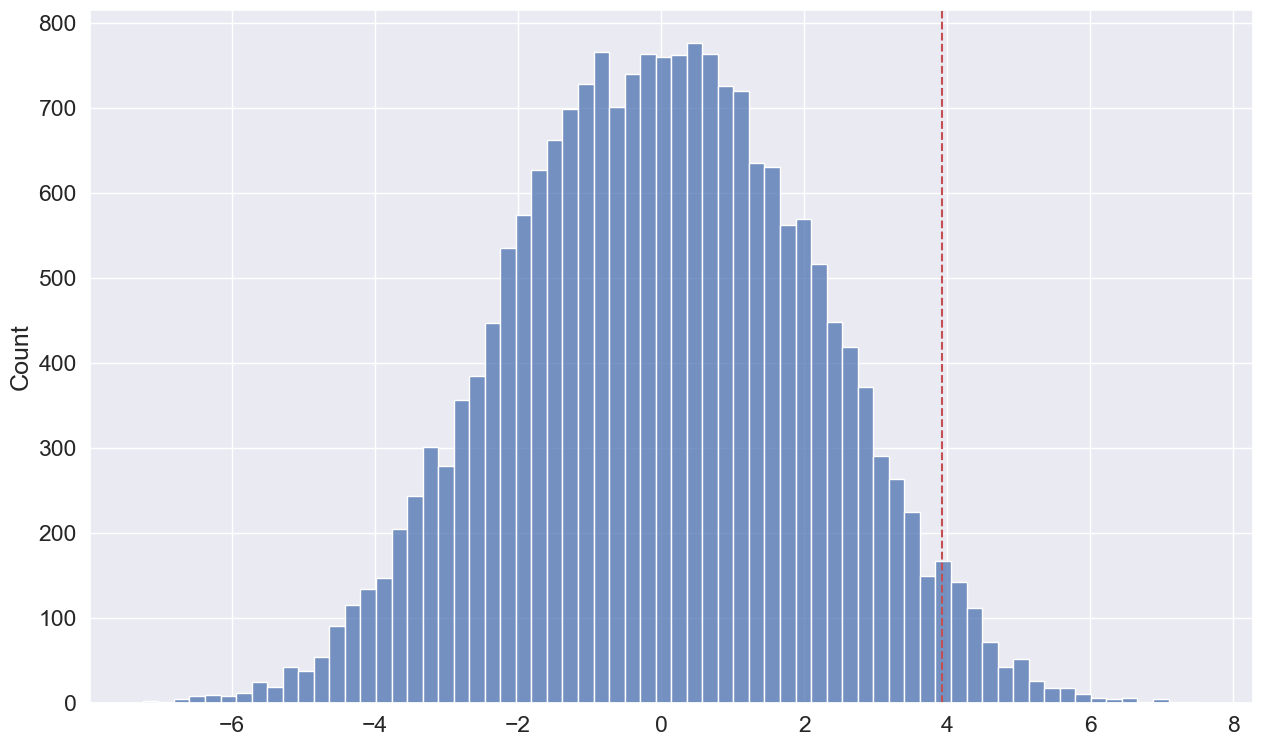

ab_mu_diff: 3.93


In [17]:
# creo un grafico per avere un riferimento visivo di dove si trova il p_value
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('ab_mu_diff:', round(mu_diff, 2))

In [18]:
# valutiamo i risultati estremi e vediamo il risultato del p_value
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)

Results more extreme than observed: 604
Total results: 20000
p-value: 604 / 20000 = 0.0302


In [19]:
# con un alpha del 5% il risultato trovato è statitisticamente significativo e rigettiamo H0
alpha = 0.05
if p_value <= alpha: 
    print('p-value',p_value,'<= alpha',alpha, '| the observed result is statistically significant | H0 rejected')
else: 
    print('p-value > alpha | the observed result is not statistically significant | H0 accepted')

p-value 0.0302 <= alpha 0.05 | the observed result is statistically significant | H0 rejected


### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [20]:
# carico il file excel
happy = pd.read_excel("data/world_happiness.xlsx")

In [21]:
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

In [22]:
#ispeziono la colonna happines_score
happy['happiness_score']

0      155
1      154
2      153
3      152
4      151
      ... 
138      4
139      3
140      2
141      1
142      0
Name: happiness_score, Length: 143, dtype: int64

<AxesSubplot:xlabel='happiness_score', ylabel='Count'>

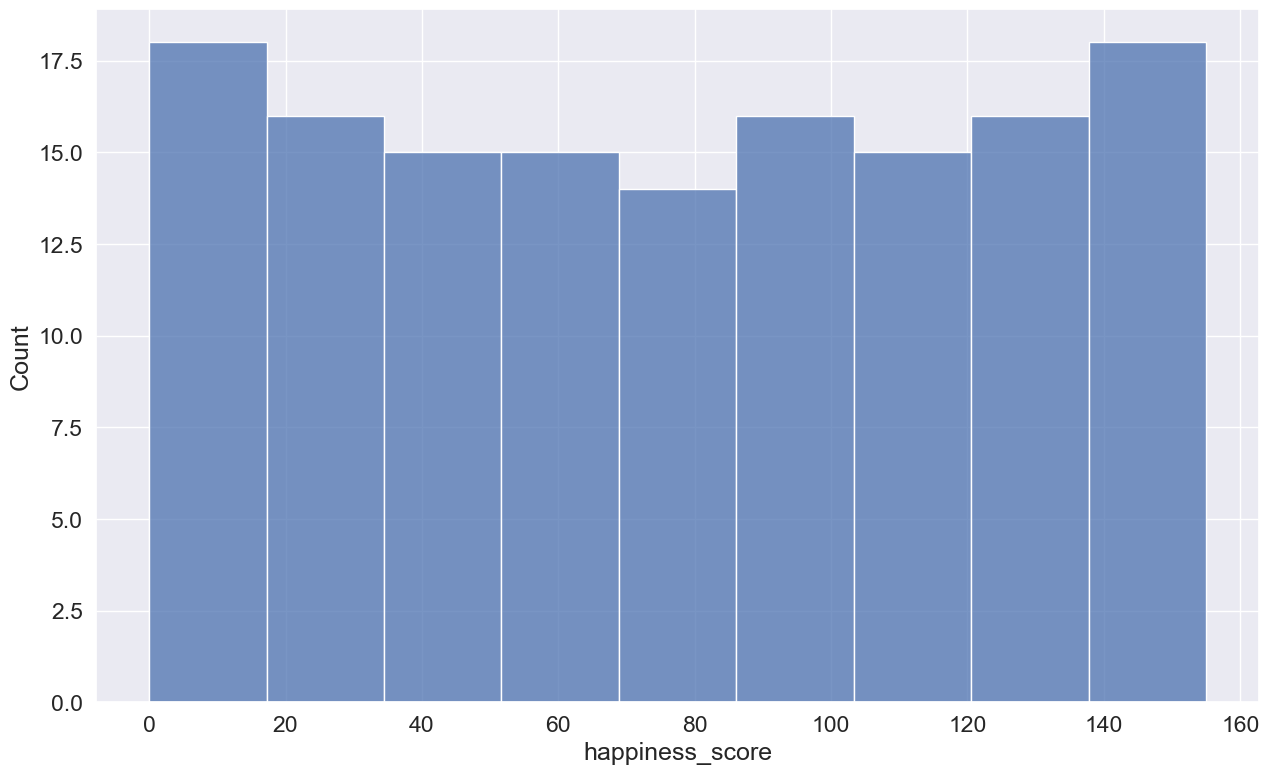

In [23]:
# la distribuzione è uniforme
sns.histplot(happy['happiness_score'])

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

In [24]:
# valuto la correlazione usando la funzione corr
happy.corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


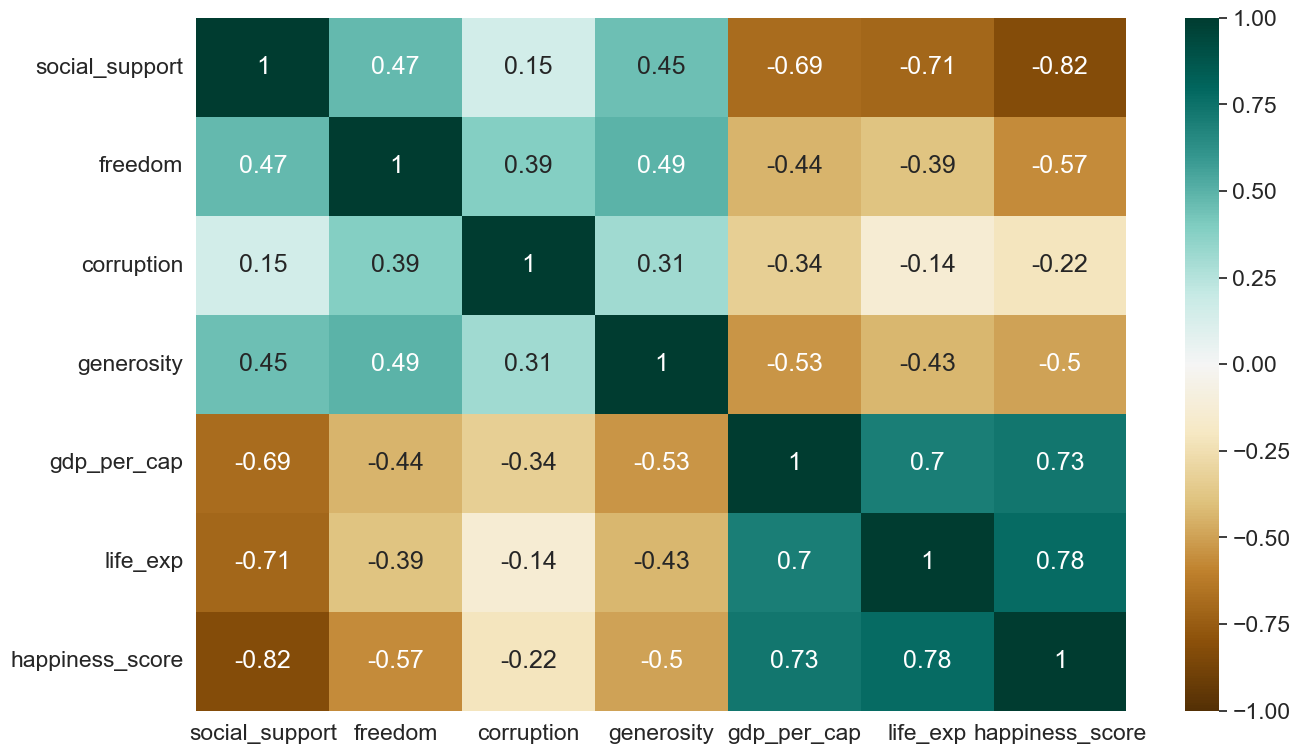

In [25]:
# uso un'heatmap per avere una visione più chiara sulla correlazione
sns.heatmap(happy.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [26]:
# verifico i valori del mio data frame e noto che ci sono dei valori nulli al suo interno
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


In [27]:
# conto i valori nulli e li sommo per avere una panoramica
happy.isna().sum()

country            0
social_support     1
freedom            1
corruption         8
generosity         1
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

In [28]:
#utilizzo describe per vedere la media
happy.describe()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,142.000000,142.000000,135.000000,142.00000,143.000000,143.000000,143.000000
mean,77.352113,77.000000,73.244444,78.78169,20124.286713,73.796503,77.643357
std,45.743379,45.569058,42.237507,44.87921,20570.547556,7.092194,46.377418
min,1.000000,1.000000,1.000000,1.00000,631.000000,52.900000,0.000000
25%,37.250000,37.500000,37.500000,41.25000,4110.000000,69.100000,36.500000
50%,76.000000,75.500000,74.000000,80.50000,13000.000000,74.900000,79.000000
75%,116.750000,116.750000,109.500000,116.75000,29750.000000,79.650000,118.000000
max,155.000000,155.000000,148.000000,155.00000,113000.000000,85.100000,155.000000


In [29]:
# sostituisco i record nulli con la media della colonna di appartenenza
happy.fillna(happy.mean(),inplace=True)

C:\Users\dricc\AppData\Local\Temp\ipykernel_3280\838121680.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happy.fillna(happy.mean(),inplace=True)


In [30]:
# verifico che non ci siano più valori nulli
happy.isna().sum()

country            0
social_support     0
freedom            0
corruption         0
generosity         0
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

In [31]:
#calcolo il coefficiente di correlazione tra life_exp e happiness_score
correl = happy.happiness_score.corr(happy.life_exp)
print('Correlation coefficient between X and Y:', round(correl, 2))

Correlation coefficient between X and Y: 0.78


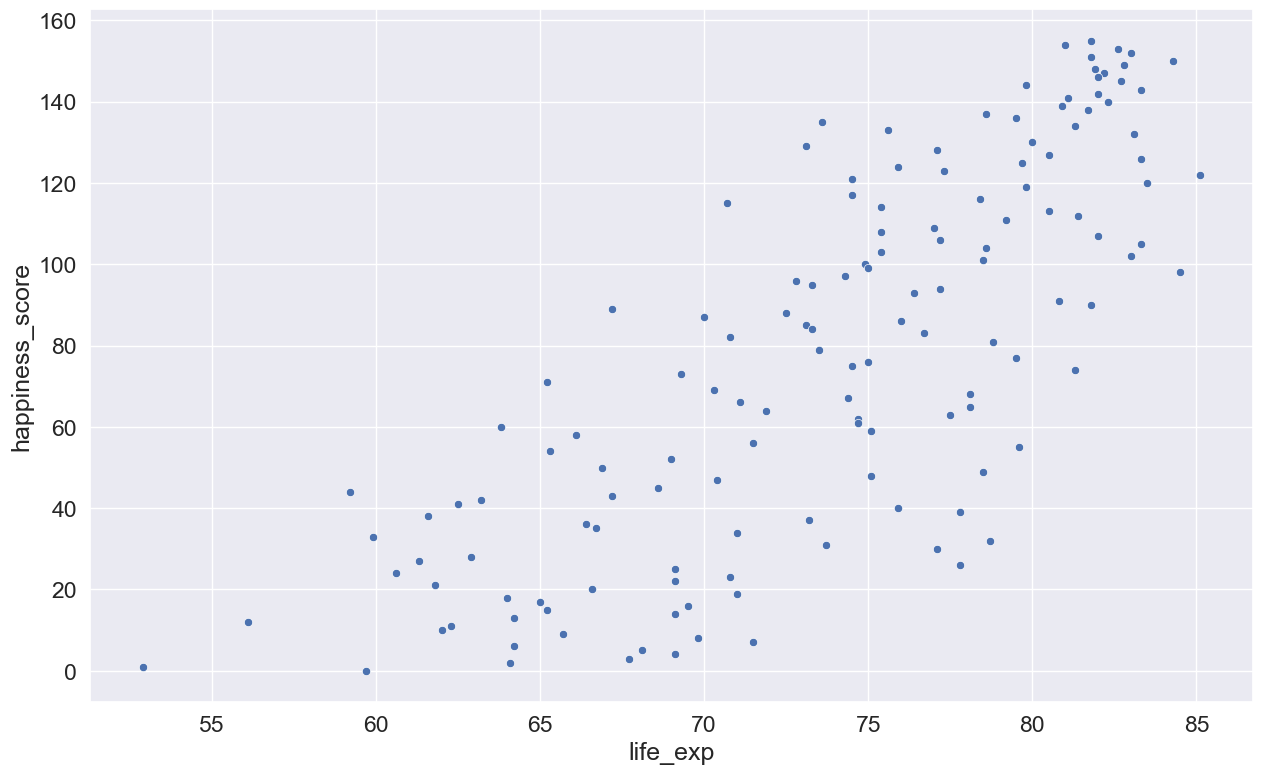

In [32]:
# uso uno scatterplot per avere una visione più chiara sulla distribuzione dei dati
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
plt.show()

In [33]:
import statsmodels.api as sm
Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X)   # add a constant to the model
model = sm.OLS(endog=Y,exog=X)
results = model.fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.59e-30
Time:                        10:25:56   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
def lin_reg_coef(x, y): 
    
    # calculate the means of the X and Y variables
    X_mean = np.mean(x)
    Y_mean = np.mean(y)
    
    # calculate the deviations from the mean of each data point (for X and Y)
    X_mean_dev = [el-X_mean for el in x]
    Y_mean_dev = [el-Y_mean for el in y]
    
    # calculate the covariance between X and Y and the variance of X
    XY_covar = np.sum(np.array(X_mean_dev) * np.array(Y_mean_dev))
    X_var = np.sum(np.array(X_mean_dev)**2)
    
    # calculate the slope (b_1) and intercept (b_0) coefficients
    b_1 = XY_covar/X_var
    b_0 = Y_mean - b_1*X_mean
    
    return b_0, b_1

In [36]:
intercept, slope = lin_reg_coef(x=happy['life_exp'], y=happy['happiness_score'])

print('Intercept:', intercept)
print('Slope:', slope)

Intercept: -298.8710186716583
Slope: 5.102062529735627


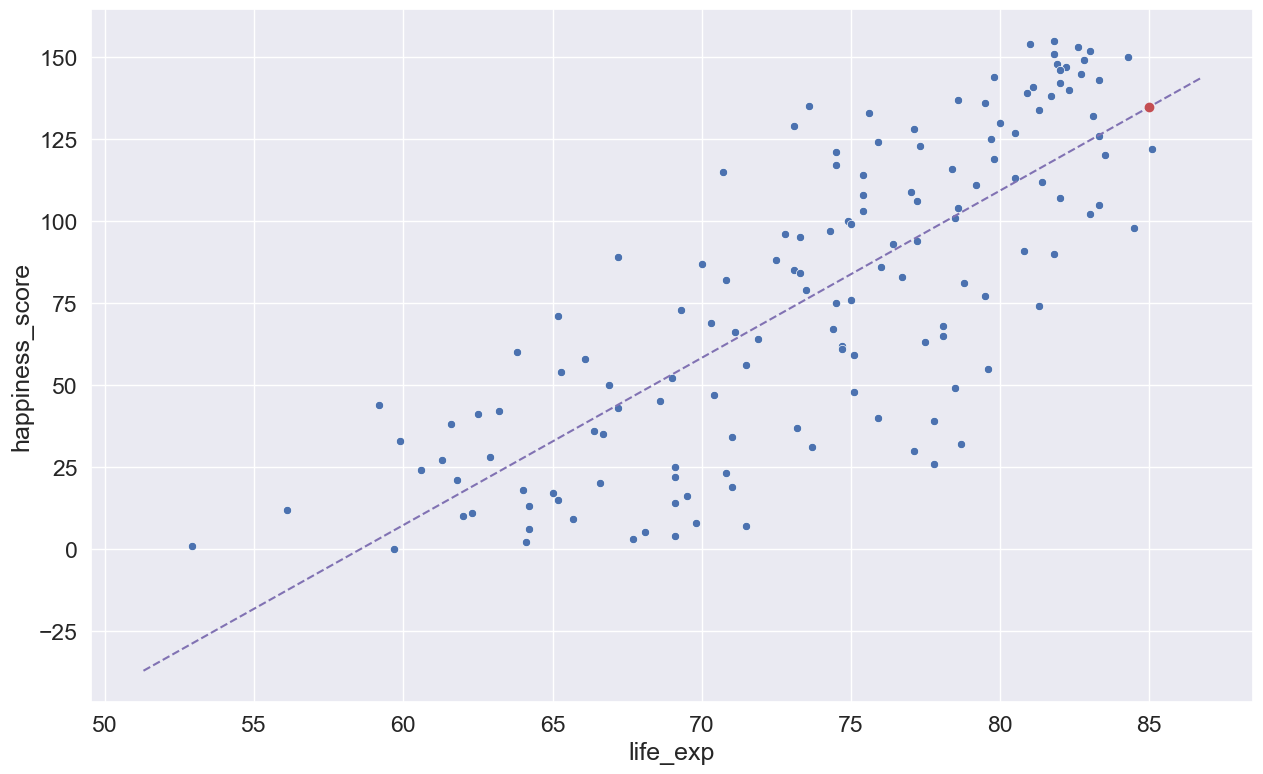

In [37]:
# plot the data points using a scatter plot
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='m')   # draw the regression line on top of the scatter plot

# plot the new observed x-value and the relative prediction
plt.plot(85, results.predict(np.array([1, 85]))[0], 'ro')

plt.show()

In [38]:
results.predict(np.array([1, 85]))

array([134.80429636])

In [39]:

year_0 = results.predict(np.array([1, 85]))
year_1 = results.predict(np.array([1, 84]))
year_diff = year_0 - year_1
year_diff = year_diff[0]
year_diff = round(year_diff, 2)
print("a 1-year increase in life expectancy corresponds to an increase of " + str(year_diff) + " of the happiness score")

a 1-year increase in life expectancy corresponds to an increase of 5.1 of the happiness score


9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [40]:
happy.corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.153112,0.449225,-0.635651,-0.703274,-0.821384
freedom,0.470893,1.000000,0.379438,0.493207,-0.411042,-0.387622,-0.565298
corruption,0.153112,0.379438,1.000000,0.296768,-0.292755,-0.133278,-0.211122
generosity,0.449225,0.493207,0.296768,1.000000,-0.491708,-0.431770,-0.497250
gdp_per_cap,-0.635651,-0.411042,-0.292755,-0.491708,1.000000,0.701955,0.727973
life_exp,-0.703274,-0.387622,-0.133278,-0.431770,0.701955,1.000000,0.780225
happiness_score,-0.821384,-0.565298,-0.211122,-0.497250,0.727973,0.780225,1.000000


In [41]:
happy.corr()['happiness_score'].sort_values(ascending=False)

happiness_score    1.000000
life_exp           0.780225
gdp_per_cap        0.727973
corruption        -0.211122
generosity        -0.497250
freedom           -0.565298
social_support    -0.821384
Name: happiness_score, dtype: float64

In [42]:
# faccio un train test split
y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
#calcolo R2 usando sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R-quadro train: {r2_train}")
print(f"R-quadro test: {r2_test}")

R-quadro train: 0.784887383901449
R-quadro test: 0.7772372395041662


In [44]:
# osservo il summary del modello train
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           3.39e-29
Time:                        10:25:57   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X.head()

,const,social_support,freedom,generosity,life_exp
0,1.0,2.0,5.0,47.0,81.8
1,1.0,4.0,6.0,22.0,81.0
2,1.0,3.0,3.0,11.0,82.6
3,1.0,1.0,7.0,3.0,83.0
4,1.0,15.0,19.0,7.0,81.8


In [46]:
# inserisco un array con i valori corrispondenti alle colonne per fare una predizione di happiness score
pred_happines = results.predict(np.array([1,2,5,47,81]))
print('Predicted happiness score:', int(pred_happines[0]))

Predicted happiness score: 143


10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [49]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

Naïve Training MAE: 40.38
Training MAE: 16.92


In [50]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 39.94
Testing MAE: 17.54


In [51]:
#calcolo il MAPE per vedere la percentuale di errore del modello
mape = np.mean(np.abs((y_test - pred_test)/y_test))*100
mape

38.626997246765235

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

In [52]:
# ispeziono il modello e in particolare i coefficienti
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           3.39e-29
Time:                        10:25:58   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Noto che social support, freedom e generosity hanno un coefficiente negativo, quando avrebbero dovuto influenzare in maniera positiva l'happiness score.

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

Importing plotly failed. Interactive plots will not work.
10:25:59 - cmdstanpy - INFO - Chain [1] start processing
10:25:59 - cmdstanpy - INFO - Chain [1] done processing


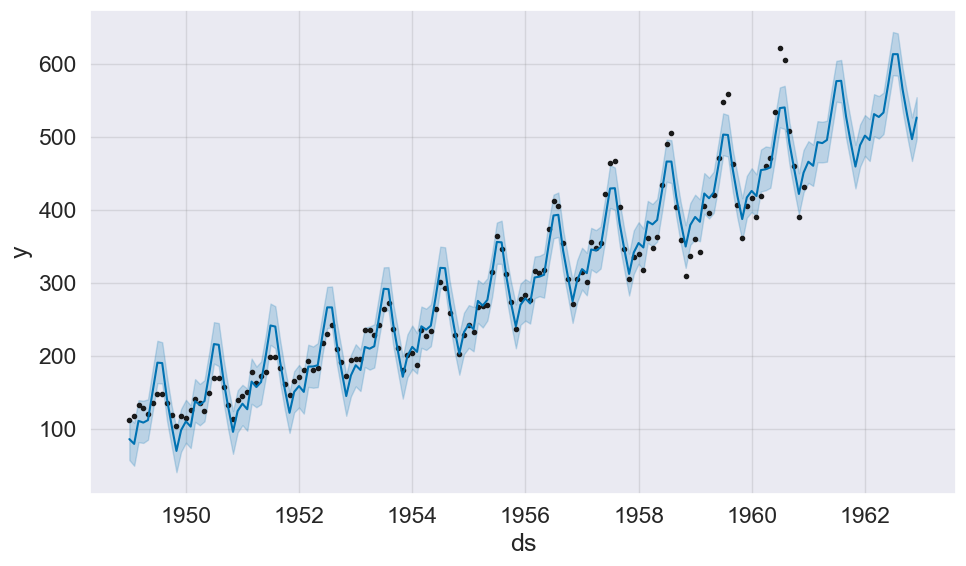

In [54]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_excel('data/air-passengers.xlsx')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

10:25:59 - cmdstanpy - INFO - Chain [1] start processing
10:25:59 - cmdstanpy - INFO - Chain [1] done processing


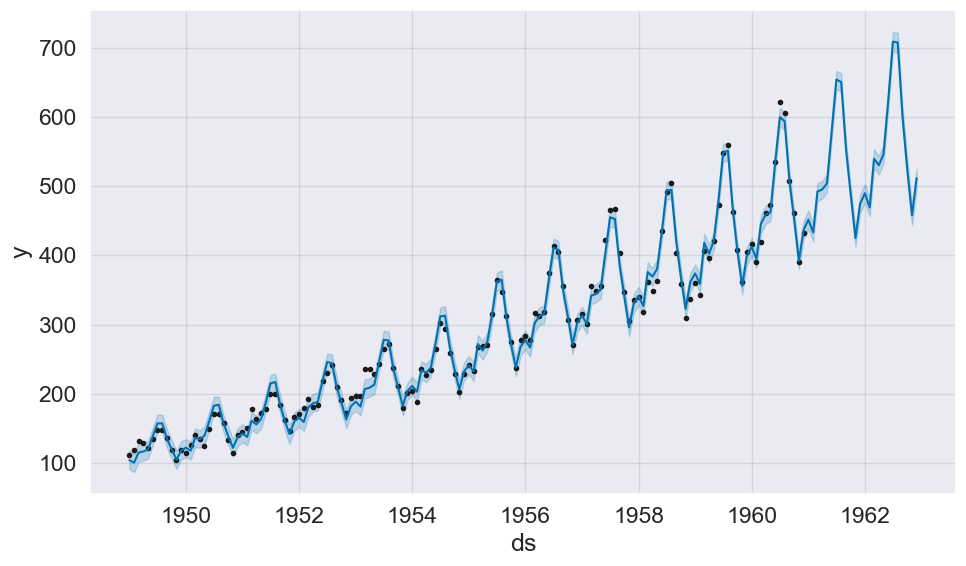

In [55]:
# prophet di default aggiunge la stagionalita al trend per ottenere il forecast e in questo caso non funziona perché gli effetti stagionali non sono costanti(come ad esempio le stagioni)
# la stagionalità viene modellata grazie a multiplicative, i componenti ora mostrano la stagionalità come percentuale del trend che varia in base al livello della serie temporale
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

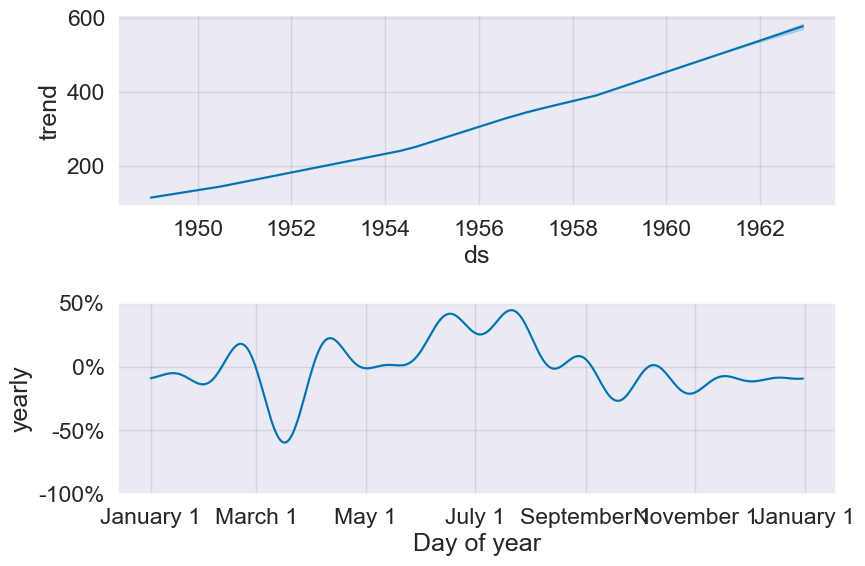

In [56]:
fig = m.plot_components(forecast)